In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape
# pre-process data
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

In [4]:
# validation
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]
X_valid.shape

(5000, 28, 28)

In [5]:
# training
X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_train.shape

(55000, 28, 28)

In [6]:
# Part 1: Fully connected neural network
from functools import partial

my_dense_layer = partial(tf.keras.layers.Dense, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001))

model = tf.keras.models.Sequential([
    # define layers
    # flatten 28x28 image
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    # how many neurons
    # widen
    # deepen
    my_dense_layer(300),
    my_dense_layer(120),
    my_dense_layer(120),
    # need 10 neurons (classes), 10 probs
    my_dense_layer(10, activation="softmax")
])

In [7]:
# training options
# loss function
# learning_rate - start with guess and update
# how much to change weights at each step
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=["accuracy"])

In [13]:
# epochs - how many steps - use more
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 22s 391us/sample - loss: 0.3076 - accuracy: 0.9080 - val_loss: 0.3783 - val_accuracy: 0.8894
Epoch 2/5
55000/55000 [==============================] - 21s 389us/sample - loss: 0.3043 - accuracy: 0.9094 - val_loss: 0.3740 - val_accuracy: 0.8884
Epoch 3/5
55000/55000 [==============================] - 22s 392us/sample - loss: 0.3019 - accuracy: 0.9103 - val_loss: 0.3702 - val_accuracy: 0.8940
Epoch 4/5
55000/55000 [==============================] - 22s 395us/sample - loss: 0.2995 - accuracy: 0.9112 - val_loss: 0.4101 - val_accuracy: 0.8798
Epoch 5/5
55000/55000 [==============================] - 22s 394us/sample - loss: 0.2983 - accuracy: 0.9126 - val_loss: 0.3728 - val_accuracy: 0.8908


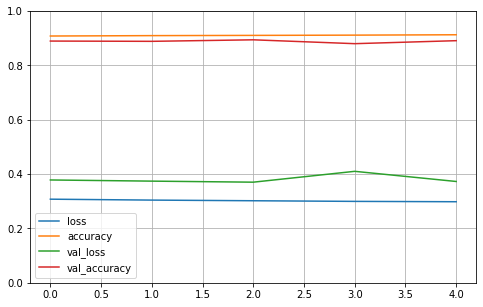

In [14]:
# 89.08
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [15]:
y_pred = model.predict_classes(X_train)
conf_train = confusion_matrix(y_train, y_pred)
print(conf_train)
# rows pred, cols real, diag correct
# largest off diag
# predict 6 shirt, actually 0 t-shirt

[[5033    1   36   39    9    1  405    0   19    0]
 [  14 5399    1   20    3    0    5    0    2    0]
 [  68    2 4581   15  325    0  495    0   10    0]
 [ 188   63   19 4927  207    0   93    0    2    0]
 [   9    4  452   71 4641    0  329    0    6    0]
 [   0    0    0    0    0 5406    0   95    2    4]
 [ 623    4  206   48  229    0 4370    0   27    0]
 [   0    0    0    0    0    9    0 5430    2   47]
 [  10    2    0    4   10    0   13    0 5470    1]
 [   0    0    0    0    0   33    0  311    1 5149]]


In [16]:
model.evaluate(X_test, y_test)

y_pred = model.predict_classes(X_test)
conf_test = confusion_matrix(y_test, y_pred)
print(conf_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[[862   0   8  11   6   1 103   0   9   0]
 [ 10 967   1  13   5   0   3   0   1   0]
 [ 19   1 786   5  76   1 111   0   1   0]
 [ 34  19   8 857  41   0  36   0   5   0]
 [  0   0 108  19 799   0  71   0   3   0]
 [  0   0   0   0   0 963   0  27   1   9]
 [153   0  55  15  54   0 709   0  14   0]
 [  0   0   0   0   0   8   0 980   0  12]
 [  7   0   2   3   5   2   5   3 973   0]
 [  0   0   0   0   0  13   1  74   0 912]]


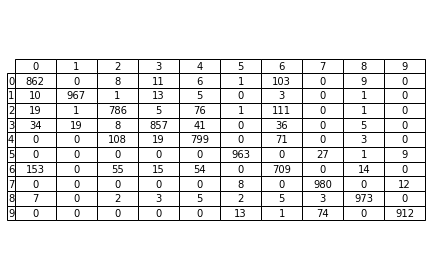

In [17]:
# 88.08 test accuracy
fig, ax = plt.subplots()

fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

df = pd.DataFrame(conf_test)
ax.table(cellText=df.values, rowLabels=np.arange(10),colLabels=np.arange(10),
        loc='center',cellLoc='center')
fig.tight_layout()
plt.savefig('conf_mat.pdf')

In [18]:
# Part 2: convolutional neural network
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [23]:
my_dense_layer = partial(tf.keras.layers.Dense, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001))

my_conv_layer = partial(tf.keras.layers.Conv2D, activation="relu", padding = "valid")

model = tf.keras.models.Sequential([
    my_conv_layer(32, 4, padding = "same", input_shape=[28,28,1]),
    tf.keras.layers.MaxPooling2D(2),
    my_conv_layer(32,4),
    tf.keras.layers.Flatten(),
    my_dense_layer(300),
    my_dense_layer(100),
    # need 10 neurons (classes), 10 probs
    my_dense_layer(10, activation="softmax")
])

In [24]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=["accuracy"])

In [25]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 84s 2ms/sample - loss: 0.4719 - accuracy: 0.8495 - val_loss: 0.3482 - val_accuracy: 0.8980
Epoch 2/10
55000/55000 [==============================] - 82s 1ms/sample - loss: 0.3395 - accuracy: 0.8987 - val_loss: 0.3284 - val_accuracy: 0.9038
Epoch 3/10
55000/55000 [==============================] - 88s 2ms/sample - loss: 0.3087 - accuracy: 0.9107 - val_loss: 0.3184 - val_accuracy: 0.9104
Epoch 4/10
55000/55000 [==============================] - 96s 2ms/sample - loss: 0.2860 - accuracy: 0.9192 - val_loss: 0.3146 - val_accuracy: 0.9112
Epoch 5/10
55000/55000 [==============================] - 83s 2ms/sample - loss: 0.2651 - accuracy: 0.9290 - val_loss: 0.2923 - val_accuracy: 0.9190
Epoch 6/10
55000/55000 [==============================] - 83s 2ms/sample - loss: 0.2488 - accuracy: 0.9341 - val_loss: 0.3018 - val_accuracy: 0.9138
Epoch 7/10
55000/55000 [==============================] -

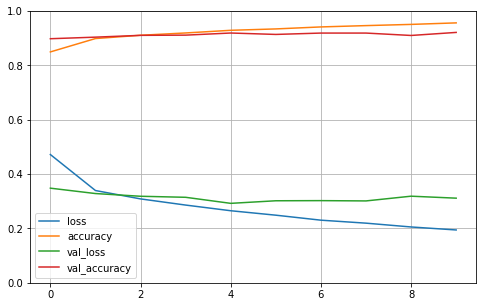

In [26]:
# 92.12%
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [27]:
y_pred = model.predict_classes(X_train)
conf_train = confusion_matrix(y_train, y_pred)
print(conf_train)

[[5276    2   12   16    3    0  232    0    2    0]
 [   0 5422    0   16    2    0    4    0    0    0]
 [  49    1 4875   17  399    0  155    0    0    0]
 [  31    2    8 5322   77    0   59    0    0    0]
 [   2    0   15   35 5406    0   54    0    0    0]
 [   0    0    0    0    0 5504    0    3    0    0]
 [ 230    0   68   38  139    0 5031    0    1    0]
 [   0    0    0    0    0   30    0 5320    0  138]
 [   5    1    0    7    2    0    5    0 5489    1]
 [   0    0    0    0    0   20    0   32    0 5442]]


In [28]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3498102780342102, 0.9126]

In [29]:
# 91.26
y_pred = model.predict_classes(X_test)
conf_test = confusion_matrix(y_test, y_pred)
print(conf_test)

[[877   0  12   8   4   0  92   0   7   0]
 [  0 981   0  10   4   0   4   0   1   0]
 [ 21   1 812   8  90   0  68   0   0   0]
 [ 19   1  11 904  30   0  33   0   2   0]
 [  1   1  15  20 922   0  41   0   0   0]
 [  0   0   0   0   0 988   0   7   1   4]
 [107   1  45  14  82   0 747   0   4   0]
 [  0   0   0   0   0  13   0 944   0  43]
 [  4   0   2   2   7   1   5   1 978   0]
 [  0   0   0   0   0  11   0  16   0 973]]


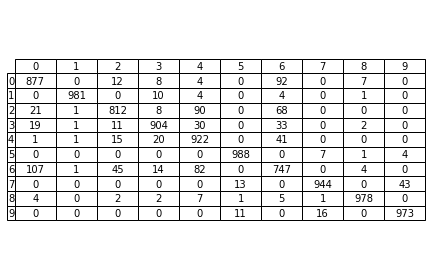

In [30]:
# print conf matrix
fig, ax = plt.subplots()

fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

df = pd.DataFrame(conf_test)
ax.table(cellText=df.values, rowLabels=np.arange(10),colLabels=np.arange(10),
        loc='center',cellLoc='center')
fig.tight_layout()
plt.savefig('conf_mat2.pdf')